<a href="https://colab.research.google.com/github/mengwangk/dl-projects/blob/master/04_02_automated_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automated ML

In [1]:
COLAB = True

if COLAB:
  !rm -rf dl-projects
  !git clone https://github.com/mengwangk/dl-projects
  !cd dl-projects && ls 

Cloning into 'dl-projects'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 541 (delta 53), reused 51 (delta 16), pack-reused 439
Receiving objects: 100% (541/541), 67.17 MiB | 37.30 MiB/s, done.
Resolving deltas: 100% (298/298), done.
01_01_tensor.ipynb			999_Links.ipynb
01_02_correlation.ipynb			archive
01_03_preprocessing.ipynb		d01_download.ipynb
01_04_numpy.ipynb			d02_0_features.ipynb
01_05_parallelization.ipynb		d02_1_features.ipynb
01_06_pandas..ipynb			d03_train_dl.ipynb
01_07_python..ipynb			d04_train_ml.ipynb
02_1_feature_engineer.ipynb		dask-worker-space
02_2_feature_generation.ipynb		datasets
02_3_feature_generation.ipynb		exp
02_4_feature_generation.ipynb		featurelib
03_1_feature_selection.ipynb		LICENSE
03_2_feature_selection.ipynb		lstm_s1.ipynb
04_01_machine_learning.ipynb		lstm_s2.ipynb
04_02_automated_machine_learning.ipynb	lstm_s3.ipynb
04_10_basic_nn.ipynb			lst

In [0]:
if COLAB:
  !cp dl-projects/utils* .
  !cp dl-projects/preprocess* .

In [0]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import math 
import matplotlib

from scipy import stats
from collections import Counter
from pathlib import Path

plt.style.use('fivethirtyeight')

sns.set(style="ticks")

# Automated feature engineering
import featuretools as ft

# Machine learning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, MinMaxScaler, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

from IPython.display import display

from utils import *
from preprocess import *

# The Answer to the Ultimate Question of Life, the Universe, and Everything.
np.random.seed(42)

In [5]:
%aimport

Modules to reload:
all-except-skipped

Modules to skip:



## Preparation

In [0]:
if COLAB:
  DATASET_PATH = Path("dl-projects/datasets/lotto")
else:
  DATASET_PATH = Path("datasets/lotto")

DATASET = DATASET_PATH/"4D.zip"

In [0]:
data = format_tabular(DATASET)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106398 entries, 0 to 106397
Data columns (total 4 columns):
DrawNo       106398 non-null int64
DrawDate     106398 non-null datetime64[ns]
PrizeType    106398 non-null object
LuckyNo      106398 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.2+ MB


In [9]:
data.tail(10)

,DrawNo,DrawDate,PrizeType,LuckyNo
106388,503319,2019-11-17,SpecialNo1,2457
106389,503319,2019-11-17,SpecialNo10,4508
106390,503319,2019-11-17,SpecialNo2,2647
106391,503319,2019-11-17,SpecialNo3,2911
106392,503319,2019-11-17,SpecialNo4,7238
106393,503319,2019-11-17,SpecialNo5,4698
106394,503319,2019-11-17,SpecialNo6,1916
106395,503319,2019-11-17,SpecialNo7,1552
106396,503319,2019-11-17,SpecialNo8,3738
106397,503319,2019-11-17,SpecialNo9,6188


In [0]:
data['NumberId'] = data['LuckyNo']

In [11]:
data.tail(10)

,DrawNo,DrawDate,PrizeType,LuckyNo,NumberId
106388,503319,2019-11-17,SpecialNo1,2457,2457
106389,503319,2019-11-17,SpecialNo10,4508,4508
106390,503319,2019-11-17,SpecialNo2,2647,2647
106391,503319,2019-11-17,SpecialNo3,2911,2911
106392,503319,2019-11-17,SpecialNo4,7238,7238
106393,503319,2019-11-17,SpecialNo5,4698,4698
106394,503319,2019-11-17,SpecialNo6,1916,1916
106395,503319,2019-11-17,SpecialNo7,1552,1552
106396,503319,2019-11-17,SpecialNo8,3738,3738
106397,503319,2019-11-17,SpecialNo9,6188,6188


In [12]:
data.describe()

,DrawNo,LuckyNo,NumberId
count,106398.000000,106398.000000,106398.000000
mean,272049.808690,4974.075838,4974.075838
std,133554.096792,2885.679139,2885.679139
min,40792.000000,0.000000,0.000000
25%,156399.000000,2462.250000,2462.250000
50%,272056.000000,4952.000000,4952.000000
75%,387713.000000,7464.000000,7464.000000
max,503319.000000,9999.000000,9999.000000


       DrawNo   DrawDate        PrizeType  LuckyNo  NumberId
6007    66894 1994-01-05  ConsolationNo10     1760      1760
12089   93295 1995-09-10      SpecialNo10     1760      1760
33221  185101 2001-06-09   ConsolationNo6     1760      1760
41325  220403 2003-08-10       SpecialNo4     1760      1760
56402  286007 2007-06-24   ConsolationNo3     1760      1760
67267  333210 2010-04-10       SpecialNo2     1760      1760
70041  345310 2010-12-19   ConsolationNo3     1760      1760
72759  357111 2011-08-21   ConsolationNo7     1760      1760
75155  367512 2012-03-20      SpecialNo10     1760      1760
88140  424015 2015-05-17  ConsolationNo10     1760      1760
88193  424215 2015-05-23   ConsolationNo8     1760      1760
94840  453117 2017-01-04   ConsolationNo8     1760      1760


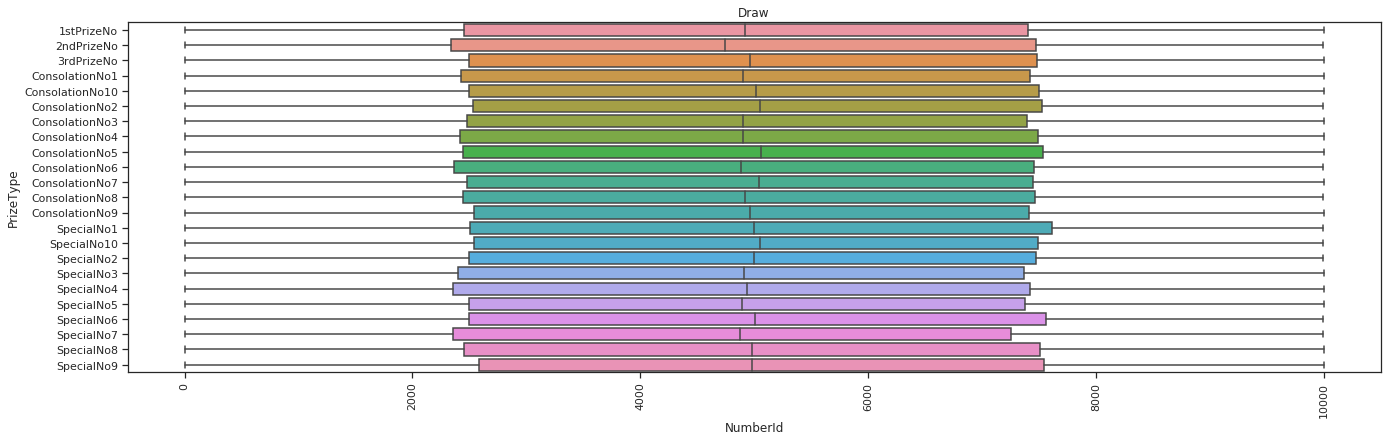

In [13]:
plt.figure(figsize=(20,6))
sns.boxplot(x='NumberId', y='PrizeType',data=data)
plt.xticks(rotation=90)
plt.title('Draw')

print(data[data['NumberId']==1760])

## Exploration

In [0]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

## Making Labels

In [15]:
data['TotalStrike'] = 1
data.head(10)

,DrawNo,DrawDate,PrizeType,LuckyNo,NumberId,TotalStrike
0,40792,1992-05-06,1stPrizeNo,19,19,1
1,40792,1992-05-06,2ndPrizeNo,1124,1124,1
2,40792,1992-05-06,3rdPrizeNo,592,592,1
3,40792,1992-05-06,ConsolationNo1,5311,5311,1
4,40792,1992-05-06,ConsolationNo10,407,407,1
5,40792,1992-05-06,ConsolationNo2,1949,1949,1
6,40792,1992-05-06,ConsolationNo3,1606,1606,1
7,40792,1992-05-06,ConsolationNo4,3775,3775,1
8,40792,1992-05-06,ConsolationNo5,6226,6226,1
9,40792,1992-05-06,ConsolationNo6,1271,1271,1


In [0]:
def make_cutoffs(start_date, end_date, threshold=0):
    # Find numbers exist before start date
    number_pool = data[data['DrawDate'] < start_date]['NumberId'].unique()
    tmp = pd.DataFrame({'NumberId': number_pool})
   
    # For numbers in the number pool, find their strike count between the start and end dates
    strike_counts = data[(data['NumberId'].isin(number_pool)) & 
        (data['DrawDate'] >= start_date) & 
        (data['DrawDate']< end_date)
    ].groupby('NumberId')['TotalStrike'].count().reset_index()
    
    number_of_draws = data[
                 (data['DrawDate'] >= start_date) & 
                 (data['DrawDate']< end_date)]['DrawDate'].nunique()
    # display(strike_counts)
    # print(number_of_draws)
    
    # Merge with all the number ids to record all customers who existed before start date
    strike_counts = strike_counts.merge(tmp, on='NumberId', how='right')
    
    # Set the total for any numbers who did not strike in the timeframe equal to 0
    strike_counts['TotalStrike'] = strike_counts['TotalStrike'].fillna(0)
    
    # Label is based on the threshold
    strike_counts['Label'] = (strike_counts['TotalStrike'] > threshold).astype(int)
        
    # The cutoff time is the start date
    strike_counts['cutoff_time'] = pd.to_datetime(start_date)
    strike_counts = strike_counts[['NumberId', 'cutoff_time', 'TotalStrike', 'Label']]
    
    #display(strike_counts[strike_counts['Label']==1].nunique())
    #display(strike_counts.sort_values(by='TotalStrike', ascending=False))
   
    return number_of_draws, strike_counts

In [17]:
number_of_draws, may_2015 = make_cutoffs(pd.datetime(2015, 5, 1), pd.datetime(2015, 6, 1))
#display(len(may_2015))
#display(may_2015[may_2015['Label']==1].nunique())
may_2015[(may_2015['Label']==1) & (may_2015['TotalStrike']==2)].sort_values(by='TotalStrike', ascending=False).head()

,NumberId,cutoff_time,TotalStrike,Label
37,904,2015-05-01,2.0,1
66,1760,2015-05-01,2.0,1
114,3012,2015-05-01,2.0,1
333,9160,2015-05-01,2.0,1
340,9417,2015-05-01,2.0,1


Text(0.5, 1.0, 'Label Distribution for May')

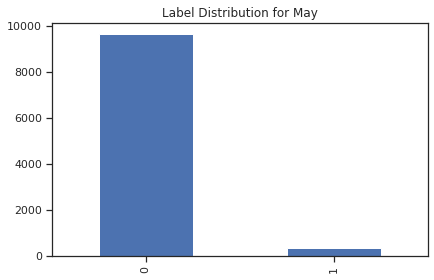

In [18]:
may_2015['Label'].value_counts().plot.bar()
plt.title('Label Distribution for May')

In [0]:
CUT_OFF_YEAR=pd.datetime(2014, 1, 1)

In [20]:
## Loop through each month starting from CUT_OFF_YEAR

from dateutil.relativedelta import relativedelta

# print(data['DrawDate'].max())
max_year_month = data['DrawDate'].max() - relativedelta(months=1) + relativedelta(day=31)
print(f"Max month year: {max_year_month}")

start_year_month = CUT_OFF_YEAR

months_data = []
total_draws = 0
while start_year_month < max_year_month:
    start_date = start_year_month 
    end_date = start_date + relativedelta(months=1)
    start_year_month = start_year_month + relativedelta(months=1)
    #print(f"Labels from {start_date} to {end_date}")
    draw_count, month_data = make_cutoffs(start_date, end_date)
    total_draws = total_draws + draw_count
    months_data.append(month_data)

print(f"Total draws: {total_draws}")
print(f"Total draws: {data[(data['DrawDate'] >= CUT_OFF_YEAR) & (data['DrawDate'] <= max_year_month)]['DrawDate'].nunique()}")
print(f"Total months:{len(months_data)}")
print(f"Total records count: {sum([len(l) for l in months_data])}")
print([len(l) for l in months_data])

Max month year: 2019-10-31 00:00:00
Total draws: 1032
Total draws: 1032
Total months:70
Total records count: 699972
[9998, 9998, 9998, 9998, 9998, 9998, 9998, 9998, 9998, 9998, 9998, 9999, 9999, 9999, 9999, 9999, 9999, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


In [21]:
labels = pd.concat(months_data)
labels.to_csv(DATASET_PATH/'labels.csv')
labels.describe()

,NumberId,TotalStrike,Label
count,699972.000000,699972.000000,699972.000000
mean,4999.414912,0.033907,0.033343
std,2886.751031,0.184113,0.179530
min,0.000000,0.000000,0.000000
25%,2499.000000,0.000000,0.000000
50%,4999.000000,0.000000,0.000000
75%,7499.000000,0.000000,0.000000
max,9999.000000,3.000000,1.000000


In [0]:
# plot_labels = labels.copy()
# plot_labels['month'] = plot_labels['cutoff_time'].dt.month

# plt.figure(figsize = (12, 6))
# sns.boxplot(x = 'month', y = 'TotalStrike', 
#             data = plot_labels[(plot_labels['TotalStrike'] > 0)]);
# plt.title('Distribution by Month');

In [23]:
labels[(labels['NumberId'] == 9016)  & (labels['Label'] > 0)]

,NumberId,cutoff_time,TotalStrike,Label
307,9016,2014-10-01,1.0,1
305,9016,2016-05-01,1.0,1


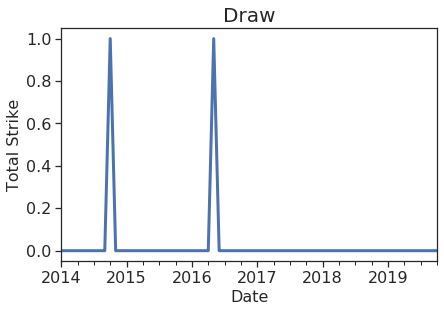

In [24]:
labels.loc[labels['NumberId'] == 9016].set_index('cutoff_time')['TotalStrike'].plot(figsize = (6, 4), linewidth = 3)
plt.xlabel('Date', size = 16); 
plt.ylabel('Total Strike', size = 16); 
plt.title('Draw', size = 20);
plt.xticks(size = 16); plt.yticks(size = 16);

## Automated Feature Engineering

In [25]:
es = ft.EntitySet(id="Lotto Results")

# Add the entire data table as an entity
es.entity_from_dataframe("Results",
                         dataframe=data,
                         index="results_index",
                         time_index = 'DrawDate')

es['Results']

2019-12-22 13:54:49,086 featuretools.entityset - WARNING    index results_index not found in dataframe, creating new integer column


Entity: Results
  Variables:
    results_index (dtype: index)
    DrawNo (dtype: numeric)
    DrawDate (dtype: datetime_time_index)
    PrizeType (dtype: categorical)
    LuckyNo (dtype: numeric)
    NumberId (dtype: numeric)
    TotalStrike (dtype: numeric)
  Shape:
    (Rows: 106398, Columns: 7)

In [26]:
es.normalize_entity(new_entity_id="Numbers",
                    base_entity_id="Results",
                    index="NumberId",
                    )

Entityset: Lotto Results
  Entities:
    Results [Rows: 106398, Columns: 7]
    Numbers [Rows: 10000, Columns: 2]
  Relationships:
    Results.NumberId -> Numbers.NumberId

In [27]:
es

Entityset: Lotto Results
  Entities:
    Results [Rows: 106398, Columns: 7]
    Numbers [Rows: 10000, Columns: 2]
  Relationships:
    Results.NumberId -> Numbers.NumberId

In [28]:
es['Numbers'].df.head(24)

,NumberId,first_Results_time
19,19,1992-05-06
407,407,1992-05-06
592,592,1992-05-06
950,950,1992-05-06
1124,1124,1992-05-06
1271,1271,1992-05-06
1606,1606,1992-05-06
1949,1949,1992-05-06
2479,2479,1992-05-06
3114,3114,1992-05-06


In [29]:
es['Results'].df.head(24)

,results_index,DrawNo,DrawDate,PrizeType,LuckyNo,NumberId,TotalStrike
0,0,40792,1992-05-06,1stPrizeNo,19,19,1
1,1,40792,1992-05-06,2ndPrizeNo,1124,1124,1
2,2,40792,1992-05-06,3rdPrizeNo,592,592,1
3,3,40792,1992-05-06,ConsolationNo1,5311,5311,1
4,4,40792,1992-05-06,ConsolationNo10,407,407,1
5,5,40792,1992-05-06,ConsolationNo2,1949,1949,1
6,6,40792,1992-05-06,ConsolationNo3,1606,1606,1
7,7,40792,1992-05-06,ConsolationNo4,3775,3775,1
8,8,40792,1992-05-06,ConsolationNo5,6226,6226,1
9,9,40792,1992-05-06,ConsolationNo6,1271,1271,1


In [30]:
len(es['Results'].df)

106398

## Deep Feature Synthesis

In [31]:
feature_matrix, feature_names = ft.dfs(entityset=es, target_entity='Numbers',
                                       cutoff_time = labels, verbose = 2,
                                       cutoff_time_in_index = True,
                                       chunk_size = len(labels), n_jobs = 1,
                                       max_depth = 1)

Built 25 features
Elapsed: 09:15 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 1/1 chunks


In [32]:
feature_matrix.columns

Index(['SUM(Results.DrawNo)', 'SUM(Results.LuckyNo)',
       'SUM(Results.TotalStrike)', 'STD(Results.DrawNo)',
       'STD(Results.LuckyNo)', 'STD(Results.TotalStrike)',
       'MAX(Results.DrawNo)', 'MAX(Results.LuckyNo)',
       'MAX(Results.TotalStrike)', 'SKEW(Results.DrawNo)',
       'SKEW(Results.LuckyNo)', 'SKEW(Results.TotalStrike)',
       'MIN(Results.DrawNo)', 'MIN(Results.LuckyNo)',
       'MIN(Results.TotalStrike)', 'MEAN(Results.DrawNo)',
       'MEAN(Results.LuckyNo)', 'MEAN(Results.TotalStrike)', 'COUNT(Results)',
       'NUM_UNIQUE(Results.PrizeType)', 'MODE(Results.PrizeType)',
       'DAY(first_Results_time)', 'YEAR(first_Results_time)',
       'MONTH(first_Results_time)', 'WEEKDAY(first_Results_time)',
       'TotalStrike', 'Label'],
      dtype='object')

In [33]:
len(feature_matrix)

699972

In [34]:
feature_matrix.head()

,,SUM(Results.DrawNo),SUM(Results.LuckyNo),SUM(Results.TotalStrike),STD(Results.DrawNo),STD(Results.LuckyNo),STD(Results.TotalStrike),MAX(Results.DrawNo),MAX(Results.LuckyNo),MAX(Results.TotalStrike),SKEW(Results.DrawNo),SKEW(Results.LuckyNo),SKEW(Results.TotalStrike),MIN(Results.DrawNo),MIN(Results.LuckyNo),MIN(Results.TotalStrike),MEAN(Results.DrawNo),MEAN(Results.LuckyNo),MEAN(Results.TotalStrike),COUNT(Results),NUM_UNIQUE(Results.PrizeType),MODE(Results.PrizeType),DAY(first_Results_time),YEAR(first_Results_time),MONTH(first_Results_time),WEEKDAY(first_Results_time),TotalStrike,Label
NumberId,time,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2014-01-01,1857929,0,8,116257.358547,0.0,0.0,394013,0,1,0.419098,0.0,0.0,91595,0,1,232241.125000,0,1,8,7,2ndPrizeNo,2,1995,8,2,0.0,0
1,2014-01-01,1571202,9,9,96697.500291,0.0,0.0,363311,1,1,0.722334,0.0,0.0,56893,1,1,174578.000000,1,1,9,7,ConsolationNo5,16,1993,5,6,0.0,0
2,2014-01-01,898913,8,4,49525.697299,0.0,0.0,265606,2,1,-1.079713,0.0,0.0,157599,2,1,224728.250000,2,1,4,4,ConsolationNo1,29,1999,9,2,0.0,0
3,2014-01-01,1628516,24,8,116134.910768,0.0,0.0,393913,3,1,0.757804,0.0,0.0,84395,3,1,203564.500000,3,1,8,7,SpecialNo6,15,1995,2,2,0.0,0
4,2014-01-01,1740613,36,9,78119.505233,0.0,0.0,335810,4,1,0.882965,0.0,0.0,100696,4,1,193401.444444,4,1,9,8,SpecialNo6,2,1996,3,5,0.0,0


In [35]:
feature_matrix.shape

(699972, 27)

In [36]:
feature_matrix.loc[9016, :].sample(10, axis = 1)

,STD(Results.TotalStrike),MEAN(Results.TotalStrike),WEEKDAY(first_Results_time),Label,MIN(Results.TotalStrike),SUM(Results.DrawNo),MEAN(Results.LuckyNo),MODE(Results.PrizeType),STD(Results.DrawNo),YEAR(first_Results_time)
time,,,,,,,,,,
2014-01-01,0.0,1,6,0,1,1325108,9016,ConsolationNo8,100214.855372,1995
2014-02-01,0.0,1,6,0,1,1325108,9016,ConsolationNo8,100214.855372,1995
2014-03-01,0.0,1,6,0,1,1325108,9016,ConsolationNo8,100214.855372,1995
2014-04-01,0.0,1,6,0,1,1325108,9016,ConsolationNo8,100214.855372,1995
2014-05-01,0.0,1,6,0,1,1325108,9016,ConsolationNo8,100214.855372,1995
...,...,...,...,...,...,...,...,...,...,...
2019-06-01,0.0,1,6,0,1,2180738,9016,ConsolationNo8,136536.790520,1995
2019-07-01,0.0,1,6,0,1,2180738,9016,ConsolationNo8,136536.790520,1995
2019-08-01,0.0,1,6,0,1,2180738,9016,ConsolationNo8,136536.790520,1995


## Correlations

In [37]:
feature_matrix = pd.get_dummies(feature_matrix).reset_index()
feature_matrix.shape

(699972, 51)

In [38]:
feature_matrix.head()

,NumberId,time,SUM(Results.DrawNo),SUM(Results.LuckyNo),SUM(Results.TotalStrike),STD(Results.DrawNo),STD(Results.LuckyNo),STD(Results.TotalStrike),MAX(Results.DrawNo),MAX(Results.LuckyNo),MAX(Results.TotalStrike),SKEW(Results.DrawNo),SKEW(Results.LuckyNo),SKEW(Results.TotalStrike),MIN(Results.DrawNo),MIN(Results.LuckyNo),MIN(Results.TotalStrike),MEAN(Results.DrawNo),MEAN(Results.LuckyNo),MEAN(Results.TotalStrike),COUNT(Results),NUM_UNIQUE(Results.PrizeType),DAY(first_Results_time),YEAR(first_Results_time),MONTH(first_Results_time),WEEKDAY(first_Results_time),TotalStrike,Label,MODE(Results.PrizeType)_1stPrizeNo,MODE(Results.PrizeType)_2ndPrizeNo,MODE(Results.PrizeType)_3rdPrizeNo,MODE(Results.PrizeType)_ConsolationNo1,MODE(Results.PrizeType)_ConsolationNo10,MODE(Results.PrizeType)_ConsolationNo2,MODE(Results.PrizeType)_ConsolationNo3,MODE(Results.PrizeType)_ConsolationNo4,MODE(Results.PrizeType)_ConsolationNo5,MODE(Results.PrizeType)_ConsolationNo6,MODE(Results.PrizeType)_ConsolationNo7,MODE(Results.PrizeType)_ConsolationNo8,MODE(Results.PrizeType)_ConsolationNo9,MODE(Results.PrizeType)_SpecialNo1,MODE(Results.PrizeType)_SpecialNo10,MODE(Results.PrizeType)_SpecialNo2,MODE(Results.PrizeType)_SpecialNo3,MODE(Results.PrizeType)_SpecialNo4,MODE(Results.PrizeType)_SpecialNo5,MODE(Results.PrizeType)_SpecialNo6,MODE(Results.PrizeType)_SpecialNo7,MODE(Results.PrizeType)_SpecialNo8,MODE(Results.PrizeType)_SpecialNo9
0,0,2014-01-01,1857929,0,8,116257.358547,0.0,0.0,394013,0,1,0.419098,0.0,0.0,91595,0,1,232241.125000,0,1,8,7,2,1995,8,2,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2014-01-01,1571202,9,9,96697.500291,0.0,0.0,363311,1,1,0.722334,0.0,0.0,56893,1,1,174578.000000,1,1,9,7,16,1993,5,6,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2014-01-01,898913,8,4,49525.697299,0.0,0.0,265606,2,1,-1.079713,0.0,0.0,157599,2,1,224728.250000,2,1,4,4,29,1999,9,2,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,2014-01-01,1628516,24,8,116134.910768,0.0,0.0,393913,3,1,0.757804,0.0,0.0,84395,3,1,203564.500000,3,1,8,7,15,1995,2,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4,2014-01-01,1740613,36,9,78119.505233,0.0,0.0,335810,4,1,0.882965,0.0,0.0,100696,4,1,193401.444444,4,1,9,8,2,1996,3,5,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [39]:
corrs = feature_matrix.corr().sort_values('TotalStrike')
corrs['TotalStrike'].head()

MODE(Results.PrizeType)_SpecialNo8       -0.003139
MODE(Results.PrizeType)_ConsolationNo9   -0.002791
NumberId                                 -0.002340
MAX(Results.LuckyNo)                     -0.002340
MEAN(Results.LuckyNo)                    -0.002340
Name: TotalStrike, dtype: float64

In [40]:
corrs['TotalStrike'].dropna().tail()

MAX(Results.DrawNo)     0.003362
MEAN(Results.DrawNo)    0.003483
SUM(Results.DrawNo)     0.003516
Label                   0.991613
TotalStrike             1.000000
Name: TotalStrike, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


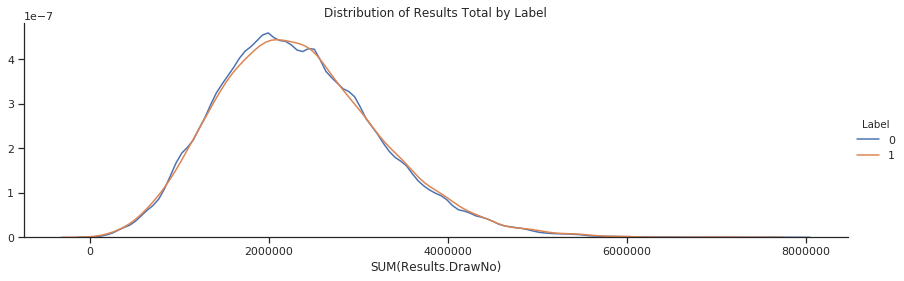

In [41]:
g = sns.FacetGrid(feature_matrix[(feature_matrix['SUM(Results.DrawNo)'] > 0)],
                  hue = 'Label', size = 4, aspect = 3)
g.map(sns.kdeplot, 'SUM(Results.DrawNo)')
g.add_legend();
plt.title('Distribution of Results Total by Label');

In [0]:
feature_matrix['month'] = feature_matrix['time'].dt.month
feature_matrix['year'] = feature_matrix['time'].dt.year

In [43]:
feature_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699972 entries, 0 to 699971
Data columns (total 53 columns):
NumberId                                   699972 non-null int64
time                                       699972 non-null datetime64[ns]
SUM(Results.DrawNo)                        699972 non-null int64
SUM(Results.LuckyNo)                       699972 non-null int64
SUM(Results.TotalStrike)                   699972 non-null int64
STD(Results.DrawNo)                        699575 non-null float64
STD(Results.LuckyNo)                       699575 non-null float64
STD(Results.TotalStrike)                   699575 non-null float64
MAX(Results.DrawNo)                        699972 non-null int64
MAX(Results.LuckyNo)                       699972 non-null int64
MAX(Results.TotalStrike)                   699972 non-null int64
SKEW(Results.DrawNo)                       696365 non-null float64
SKEW(Results.LuckyNo)                      696365 non-null float64
SKEW(Results.TotalStrike)

In [44]:
feature_matrix.head()

,NumberId,time,SUM(Results.DrawNo),SUM(Results.LuckyNo),SUM(Results.TotalStrike),STD(Results.DrawNo),STD(Results.LuckyNo),STD(Results.TotalStrike),MAX(Results.DrawNo),MAX(Results.LuckyNo),MAX(Results.TotalStrike),SKEW(Results.DrawNo),SKEW(Results.LuckyNo),SKEW(Results.TotalStrike),MIN(Results.DrawNo),MIN(Results.LuckyNo),MIN(Results.TotalStrike),MEAN(Results.DrawNo),MEAN(Results.LuckyNo),MEAN(Results.TotalStrike),COUNT(Results),NUM_UNIQUE(Results.PrizeType),DAY(first_Results_time),YEAR(first_Results_time),MONTH(first_Results_time),WEEKDAY(first_Results_time),TotalStrike,Label,MODE(Results.PrizeType)_1stPrizeNo,MODE(Results.PrizeType)_2ndPrizeNo,MODE(Results.PrizeType)_3rdPrizeNo,MODE(Results.PrizeType)_ConsolationNo1,MODE(Results.PrizeType)_ConsolationNo10,MODE(Results.PrizeType)_ConsolationNo2,MODE(Results.PrizeType)_ConsolationNo3,MODE(Results.PrizeType)_ConsolationNo4,MODE(Results.PrizeType)_ConsolationNo5,MODE(Results.PrizeType)_ConsolationNo6,MODE(Results.PrizeType)_ConsolationNo7,MODE(Results.PrizeType)_ConsolationNo8,MODE(Results.PrizeType)_ConsolationNo9,MODE(Results.PrizeType)_SpecialNo1,MODE(Results.PrizeType)_SpecialNo10,MODE(Results.PrizeType)_SpecialNo2,MODE(Results.PrizeType)_SpecialNo3,MODE(Results.PrizeType)_SpecialNo4,MODE(Results.PrizeType)_SpecialNo5,MODE(Results.PrizeType)_SpecialNo6,MODE(Results.PrizeType)_SpecialNo7,MODE(Results.PrizeType)_SpecialNo8,MODE(Results.PrizeType)_SpecialNo9,month,year
0,0,2014-01-01,1857929,0,8,116257.358547,0.0,0.0,394013,0,1,0.419098,0.0,0.0,91595,0,1,232241.125000,0,1,8,7,2,1995,8,2,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2014
1,1,2014-01-01,1571202,9,9,96697.500291,0.0,0.0,363311,1,1,0.722334,0.0,0.0,56893,1,1,174578.000000,1,1,9,7,16,1993,5,6,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2014
2,2,2014-01-01,898913,8,4,49525.697299,0.0,0.0,265606,2,1,-1.079713,0.0,0.0,157599,2,1,224728.250000,2,1,4,4,29,1999,9,2,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2014
3,3,2014-01-01,1628516,24,8,116134.910768,0.0,0.0,393913,3,1,0.757804,0.0,0.0,84395,3,1,203564.500000,3,1,8,7,15,1995,2,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2014
4,4,2014-01-01,1740613,36,9,78119.505233,0.0,0.0,335810,4,1,0.882965,0.0,0.0,100696,4,1,193401.444444,4,1,9,8,2,1996,3,5,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2014


## Preliminary Modeling

### Random Forest

In [0]:
model = RandomForestClassifier(n_estimators = 1000, 
                               random_state = 50,
                               n_jobs = -1)

In [0]:
def predict_dt(dt, feature_matrix, return_probs = False):

    feature_matrix['date'] = feature_matrix['time']

    # Subset labels
    test_labels = feature_matrix.loc[feature_matrix['date'] == dt, 'Label']
    train_labels = feature_matrix.loc[feature_matrix['date'] < dt, 'Label']

    print(f"Size of test labels {len(test_labels)}")
    print(f"Size of train labels {len(train_labels)}")
    
    # Features
    X_train = feature_matrix[feature_matrix['date'] < dt].drop(columns = ['NumberId', 'time',
                                                                                     'date', 'Label', 'TotalStrike', 'month', 'year'])
    X_test = feature_matrix[feature_matrix['date'] == dt].drop(columns = ['NumberId', 'time',
                                                                                     'date', 'Label', 'TotalStrike', 'month', 'year'])
    print(f"Size of X train {len(X_train)}")
    print(f"Size of X test  {len(X_test)}")
   

    feature_names = list(X_train.columns)
    
    # Impute and scale features
    pipeline = Pipeline([('imputer', Imputer(strategy = 'median')), 
                      ('scaler', MinMaxScaler())])

    # Fit and transform training data
    X_train = pipeline.fit_transform(X_train)
    X_test = pipeline.transform(X_test)
    
    # Labels
    y_train = np.array(train_labels).reshape((-1, ))
    y_test = np.array(test_labels).reshape((-1, ))
    
    print('Training on {} observations.'.format(len(X_train)))
    print('Testing on {} observations.\n'.format(len(X_test)))
    
    # Train 
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    p = precision_score(y_test, predictions)
    r = recall_score(y_test, predictions)
    f = f1_score(y_test, predictions)
    auc = roc_auc_score(y_test, probs)
    
    print(f'Precision: {round(p, 5)}')
    print(f'Recall: {round(r, 5)}')
    print(f'F1 Score: {round(f, 5)}')
    print(f'ROC AUC: {round(auc, 5)}')
    
    # Feature importances
    fi = pd.DataFrame({'feature': feature_names, 'importance': model.feature_importances_})
    
    if return_probs:
        return fi, probs
    
    return fi
    

In [55]:
# All the months
feature_matrix['time'].unique()

array(['2014-01-01T00:00:00.000000000', '2014-02-01T00:00:00.000000000',
       '2014-03-01T00:00:00.000000000', '2014-04-01T00:00:00.000000000',
       '2014-05-01T00:00:00.000000000', '2014-06-01T00:00:00.000000000',
       '2014-07-01T00:00:00.000000000', '2014-08-01T00:00:00.000000000',
       '2014-09-01T00:00:00.000000000', '2014-10-01T00:00:00.000000000',
       '2014-11-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2015-02-01T00:00:00.000000000',
       '2015-03-01T00:00:00.000000000', '2015-04-01T00:00:00.000000000',
       '2015-05-01T00:00:00.000000000', '2015-06-01T00:00:00.000000000',
       '2015-07-01T00:00:00.000000000', '2015-08-01T00:00:00.000000000',
       '2015-09-01T00:00:00.000000000', '2015-10-01T00:00:00.000000000',
       '2015-11-01T00:00:00.000000000', '2015-12-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2016-02-01T00:00:00.000000000',
       '2016-03-01T00:00:00.000000000', '2016-04-01

In [56]:
june_2019 = predict_dt(pd.datetime(2019,6,1), feature_matrix)

Size of test labels 10000
Size of train labels 649972
Size of X train 649972
Size of X test  10000


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Training on 649972 observations.
Testing on 10000 observations.

Precision: 0.09119
Recall: 0.08631
F1 Score: 0.08869
ROC AUC: 0.53105


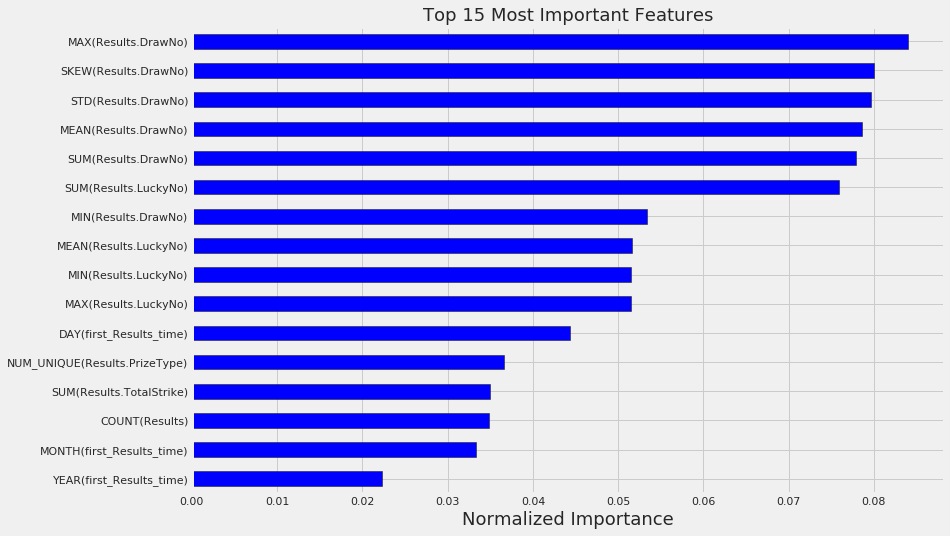

In [57]:
from utils import plot_feature_importances

norm_june_fi = plot_feature_importances(june_2019)

## Comparison to Baseline